<a href="https://colab.research.google.com/github/mussewold/tensorflow-projects-/blob/main/Sarcasm_Detection_with_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sarcasm Detection with Bidirectional LSTM


### Downloading the Dataset

In [1]:
#downloading the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-10-11 16:55:17--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  16.8MB/s    in 0.3s    

2022-10-11 16:55:18 (16.8 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



### Importing necessary libraries and opening the file as iterable 


In [2]:
import json
import tensorflow as tf
import numpy as np

In [8]:
with open('sarcasm.json') as file:
  the_file = json.load(file)

sentences = []
labels =[]

for item in the_file:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

train-test split

In [15]:
#26709 senteces
def split_train_test(data, label, train_percent):
  split_size = int(train_percent*len(data))

  training_data = data[0:split_size]
  training_label = label[0:split_size]

  test_data = data[split_size:]
  test_label = label[split_size:]

  return training_data, training_label, test_data, test_label

training_data, training_label, test_data, test_label = split_train_test(sentences, labels, 0.8)
print(f"Total data size: {len(sentences)}")
print(f"training data size: {len(training_data)}")
print(f"test data size: {len(test_data)}")

Total data size: 26709
training data size: 21367
test data size: 5342


HyperParameters (All in one place)

In [22]:
#hyperparameters
oov_tok = '<UNK>'
pad_type='post'
trunc_type='post'
vocab_size = 10000
embedding_dim = 64
max_length = 200
lstm_dim=32
dense_dim=32

Tokenizing and padding Training and Testing sentences


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_data)
word_index = tokenizer.word_index
#sequencing and padding training sentences
sequences = tokenizer.texts_to_sequences(training_data)
padded = pad_sequences(sequences,maxlen=max_length, padding=pad_type, truncating=trunc_type)
#sequencing and padding testing sentences
test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences,maxlen=max_length, padding=pad_type, truncating=trunc_type)

#casting the training and testing labels into numpy arrays
training_labels_final = np.array(training_label)
testing_labels_final = np.array(test_label)

## Lets build the model (yayyyyyyyy!!!🥳)

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 64)           640000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 666,945
Trainable params: 666,945
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs,
                    validation_data=(test_padded, testing_labels_final))

Epoch 1/10
668/668 [==============================] - 23s 21ms/step - loss: 0.3851 - accuracy: 0.8167 - val_loss: 0.3253 - val_accuracy: 0.8510
Epoch 2/10
668/668 [==============================] - 13s 20ms/step - loss: 0.1968 - accuracy: 0.9205 - val_loss: 0.3500 - val_accuracy: 0.8527
Epoch 3/10
668/668 [==============================] - 13s 20ms/step - loss: 0.1139 - accuracy: 0.9566 - val_loss: 0.3930 - val_accuracy: 0.8544
Epoch 4/10
668/668 [==============================] - 13s 20ms/step - loss: 0.0683 - accuracy: 0.9754 - val_loss: 0.5052 - val_accuracy: 0.8480
Epoch 5/10
668/668 [==============================] - 13s 20ms/step - loss: 0.0395 - accuracy: 0.9866 - val_loss: 0.6653 - val_accuracy: 0.8392
Epoch 6/10
668/668 [==============================] - 13s 19ms/step - loss: 0.0253 - accuracy: 0.9916 - val_loss: 0.7566 - val_accuracy: 0.8370
Epoch 7/10
668/668 [==============================] - 12s 18ms/step - loss: 0.0189 - accuracy: 0.9936 - val_loss: 0.8890 - val_accuracy:

### Graphs graphs graphs (yummm! 😋)

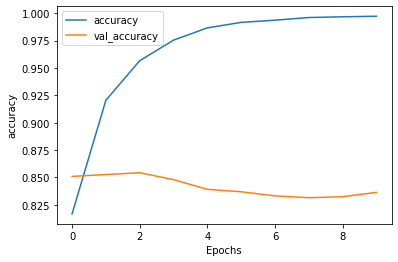

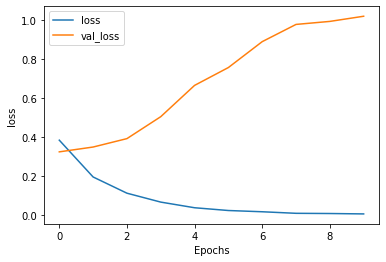

In [37]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()
plot_graph(history, 'accuracy')
plot_graph(history, 'loss')

ughhhh 😠 Mr.validation is overfitting 🤔 